## Red-Wine Quality Project

### Data Exploration

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import csv

# reformat data (change semi-colons to commas)
reader = csv.reader(open('./winequality-red.csv', "r"), delimiter=';')
writer = csv.writer(open('./winequality-red-reformatted.csv', 'w'), delimiter=',')
writer.writerows(reader)

# read reformatted data using Pandas
Data = pd.read_csv('./winequality-red-reformatted.csv')
print(Data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1519            6.6              0.70         0.08             2.6      0.106   
1520            6.5              0.53         0.06             2.0      0.063   
1521            6.9              0.48         0.20             1.9      0.082   
1522            6.1              0.32         0.25             2.3      0.071   
1523            6.8              0.48         0.25             2.0      0.076   

      free sulfur dioxide  

In [3]:
# Show data types of each column in dataframe
print(Data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [4]:
# check if any columns have missing values
print("\nFeatures         # empty elements\n")
print(Data.isnull().sum())

# display shape of data
print("\n", Data.shape)

# Since no features contain any null elements, we don't need to fill them in


Features         # empty elements

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 (1524, 12)


In [5]:
# collect data about the features
print(Data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1524.000000       1524.000000  1524.000000     1524.000000   
mean        8.391207          0.526617     0.274311        2.541109   
std         1.739809          0.180139     0.195334        1.396754   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.200000          0.390000     0.100000        1.900000   
50%         8.000000          0.520000     0.260000        2.200000   
75%         9.300000          0.635000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1524.000000          1524.000000           1524.000000  1524.000000   
mean      0.088071            15.601706             46.619423     0.996805   
std       0.047701            10.430184             33.114941     0.001898   
min       0.012000             1.000000         

<AxesSubplot: >

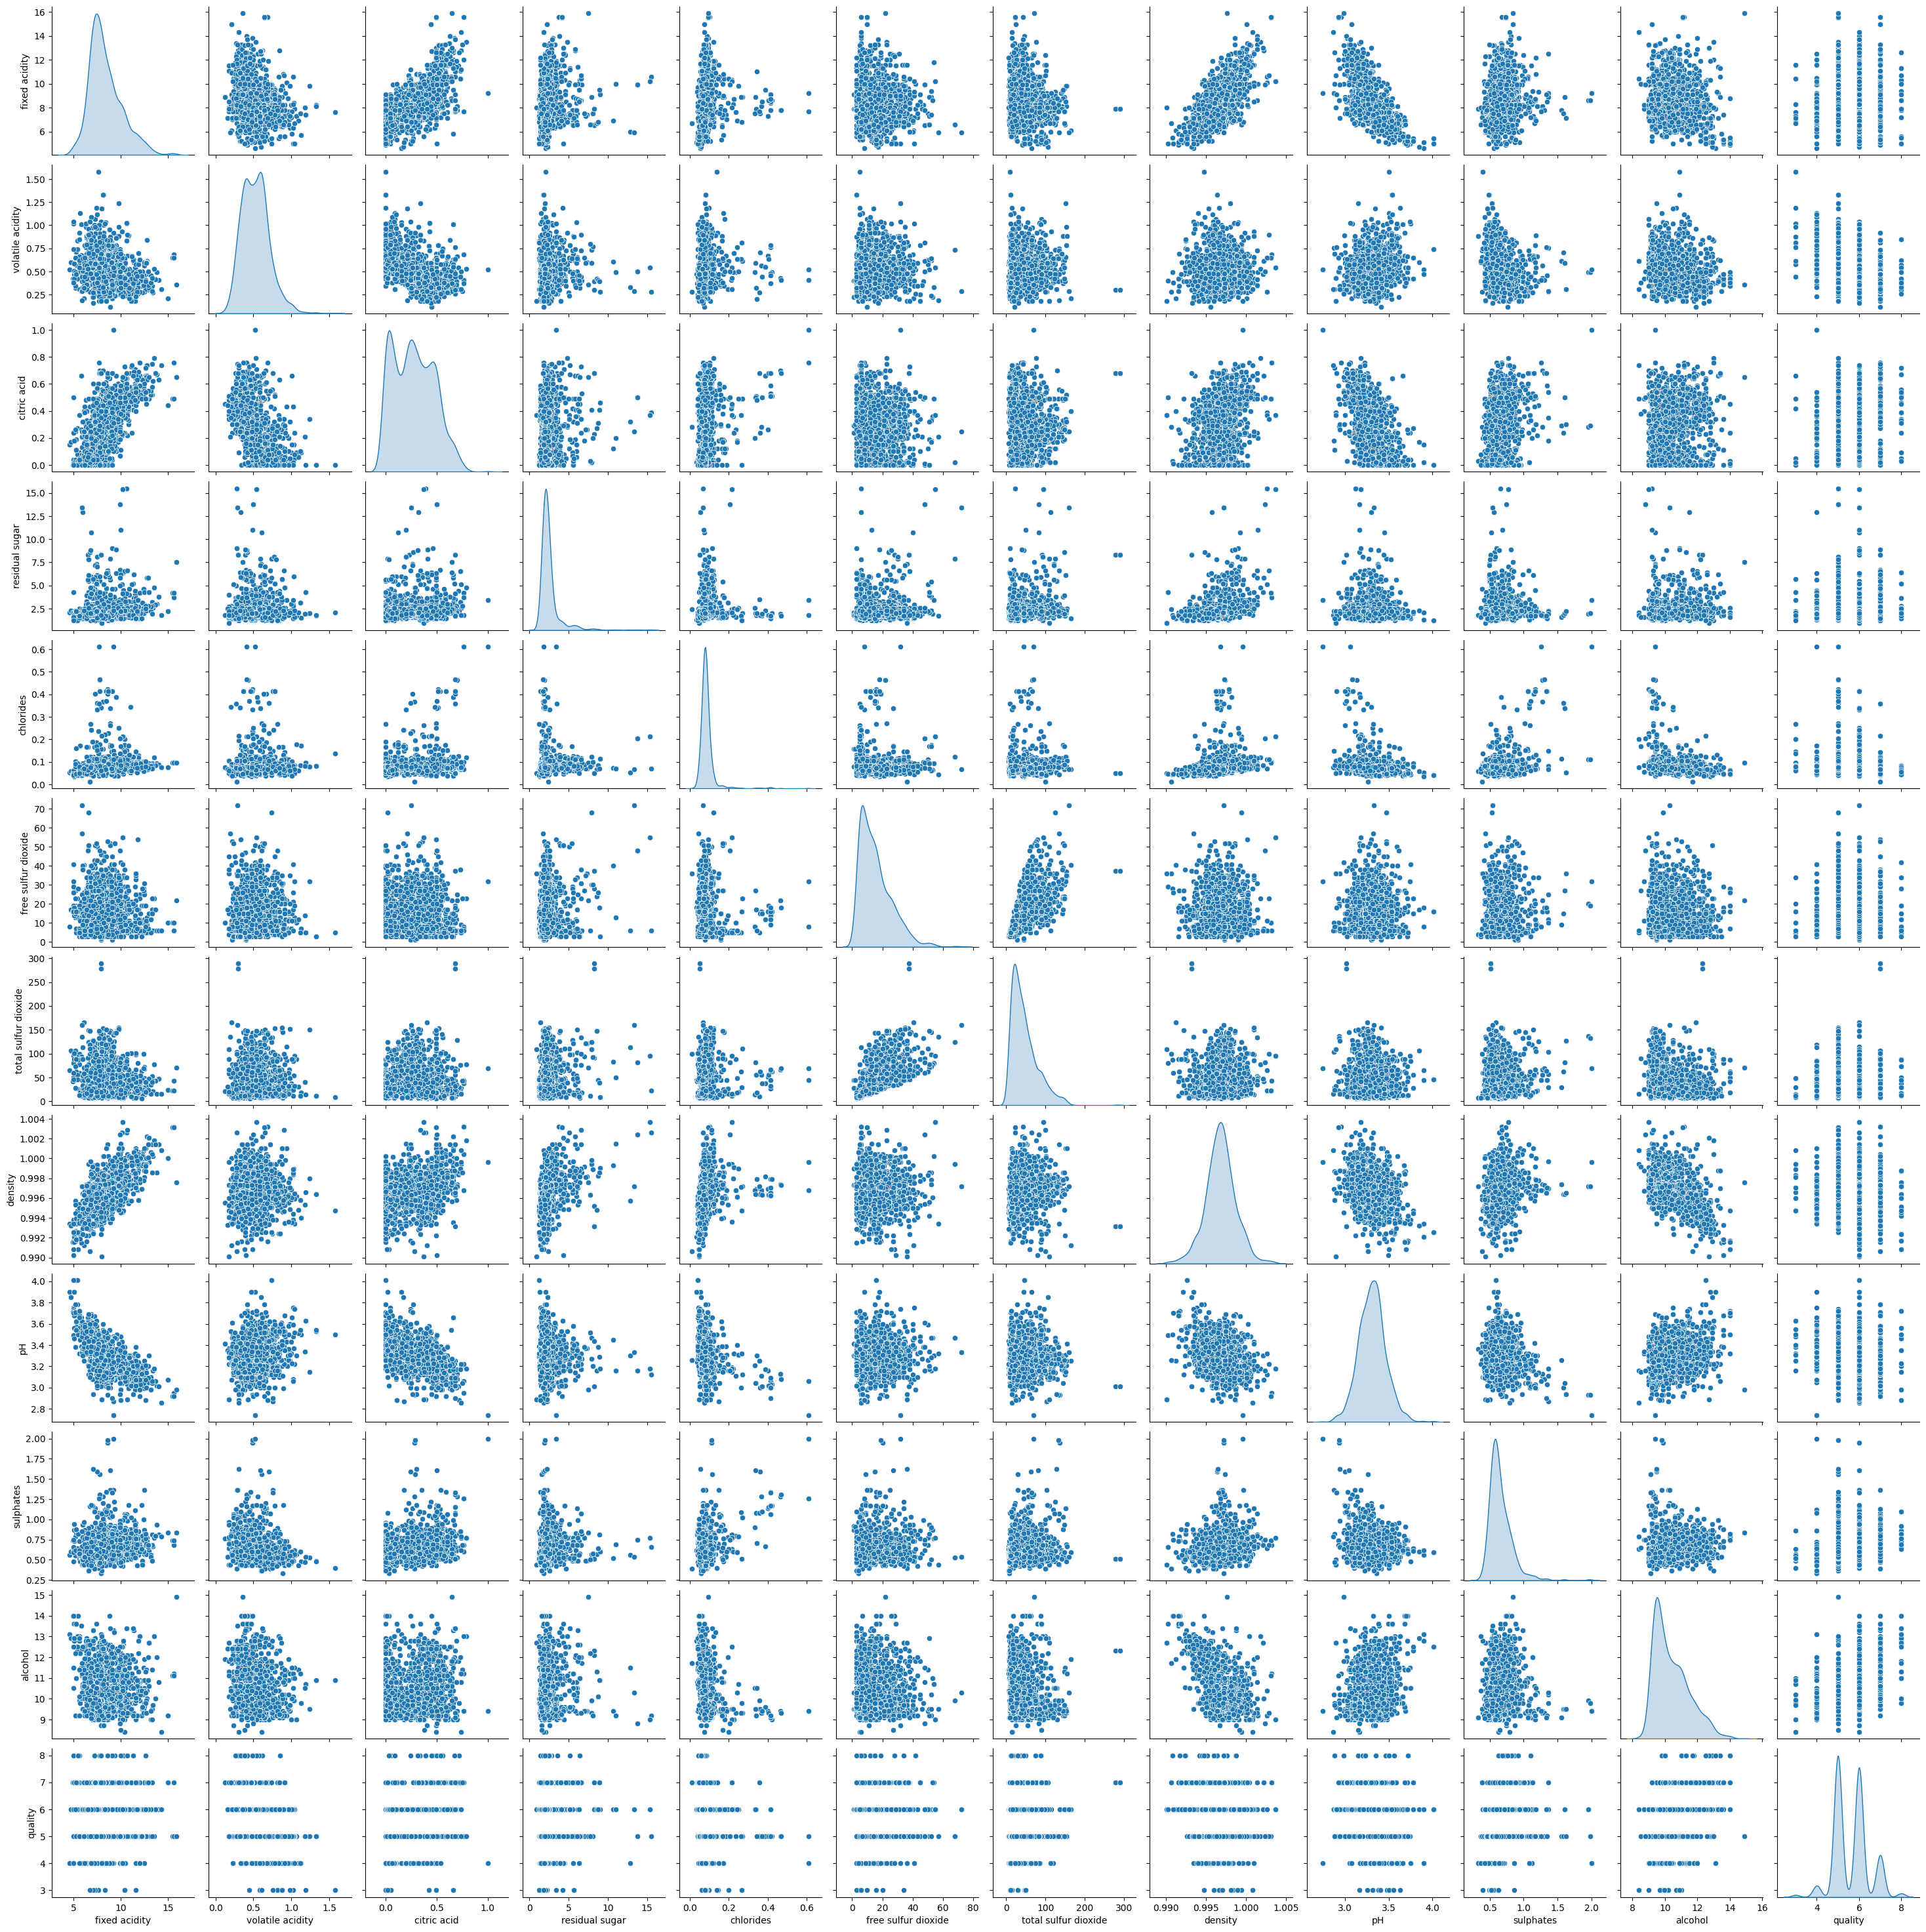

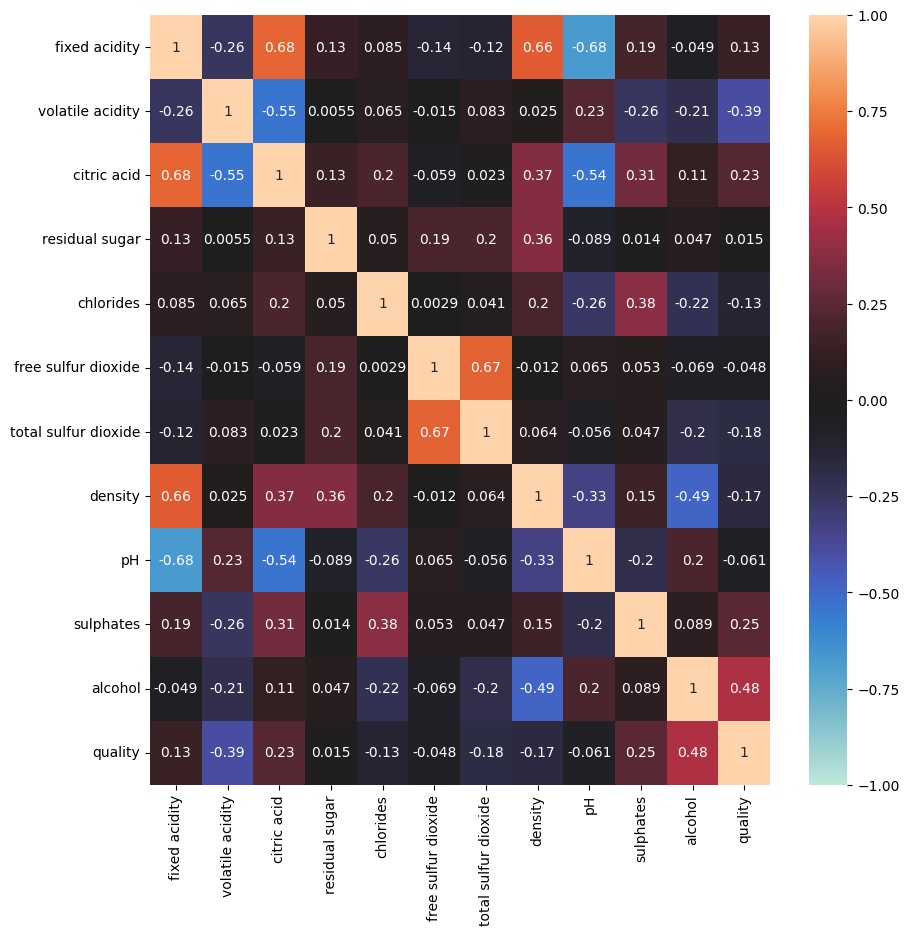

In [6]:
from matplotlib import pyplot as plt

# graph pairplot to see how data is distributed
sns.pairplot(Data, diag_kind='kde')

# generate a correlation matrix plot in the form of a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(Data.corr(), annot = True, vmin=-1, vmax=1, center= 0)

### Data Preprocessing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# create an array 'target' & populate it with False if element in quality 
# column is less than or equal to quality's median value; else populte with True
target = [0 if q <= np.median(Data.quality) else 1 for q in Data.quality]

# create a Pandas series from 'target' array
Data["target"] = pd.Series(target)
print(Data["target"])

# print out the frequency of each class in 'target' column
print("\nFrequency of each class in 'target' column:")
print(Data["target"].value_counts(), "\n")

# The frquency of ones in the target column is much lower than the frequency of
# zeros, so it might be a good idea to oversample the training data

# create instances of minmaxscaler & logistic regression
scaler = MinMaxScaler()
reg = LogisticRegression()

# drop columns & scale data
X = Data.drop(columns = ['target', 'quality'])
X = scaler.fit_transform(X)
y = Data.target

# split the data into training and testing set with the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

# oversample the training data
sm = SMOTE(random_state = 20)
X_resamp, y_resamp = sm.fit_resample(X_train, y_train)

# print out the frequency of each class in 'target' column after oversample
print("\nFrequency of each class in 'target' column:")
print(y_resamp.value_counts(), "\n")

# rescale data
scaler.fit(X_resamp, y_resamp)

0       0
1       0
2       0
3       0
4       0
       ..
1519    0
1520    0
1521    0
1522    0
1523    0
Name: target, Length: 1524, dtype: int64

Frequency of each class in 'target' column:
0    1313
1     211
Name: target, dtype: int64 


Frequency of each class in 'target' column:
0    1049
1    1049
Name: target, dtype: int64 



MinMaxScaler()

### First Model Build Using Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# fit the regression model to the resampled data and predict
reg.fit(X_resamp, y_resamp)
yhat_test = reg.predict(X_test)
yhat_train = reg.predict(X_resamp)

### Report for Model 1

MSE for testing data set is: 0.23278688524590163
MSE for training data set is: 0.18303145853193517
Training:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1049
           1       0.80      0.84      0.82      1049

    accuracy                           0.82      2098
   macro avg       0.82      0.82      0.82      2098
weighted avg       0.82      0.82      0.82      2098

Testing:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85       264
           1       0.34      0.76      0.47        41

    accuracy                           0.77       305
   macro avg       0.65      0.76      0.66       305
weighted avg       0.87      0.77      0.80       305

[ 2.87504613e+00 -3.14610316e+00 -6.18589294e-02  4.73712070e-01
 -2.17227630e+00  5.28084696e-03 -3.22929007e+00 -1.83837693e+00
 -2.66050691e-01  4.08734038e+00  6.31621483e+00]


<AxesSubplot: >

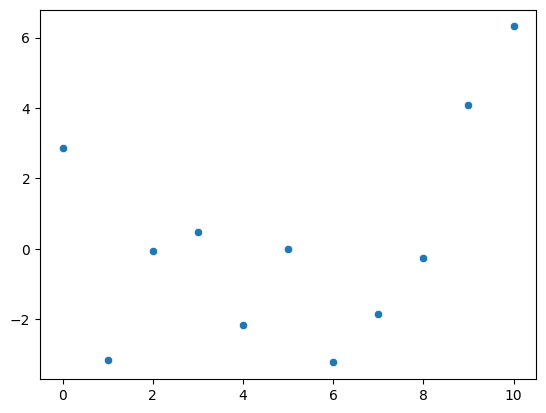

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

# find the MSE values & output
MSE_test = mean_squared_error(y_test, yhat_test)
MSE_train = mean_squared_error(y_resamp, yhat_train)
print("MSE for testing data set is:", MSE_test)
print("MSE for training data set is:", MSE_train)

# classification report
print("Training:\n",classification_report(y_resamp, yhat_train))
print("Testing:\n",classification_report(y_test, yhat_test))

# coef scatterplot
reg.score(X_test, y_test)
print(reg.coef_[0])
sns.scatterplot(x = list(range(0,len(reg.coef_[0]))),y = reg.coef_[0]) 

### Second Model Build Using [Blank]

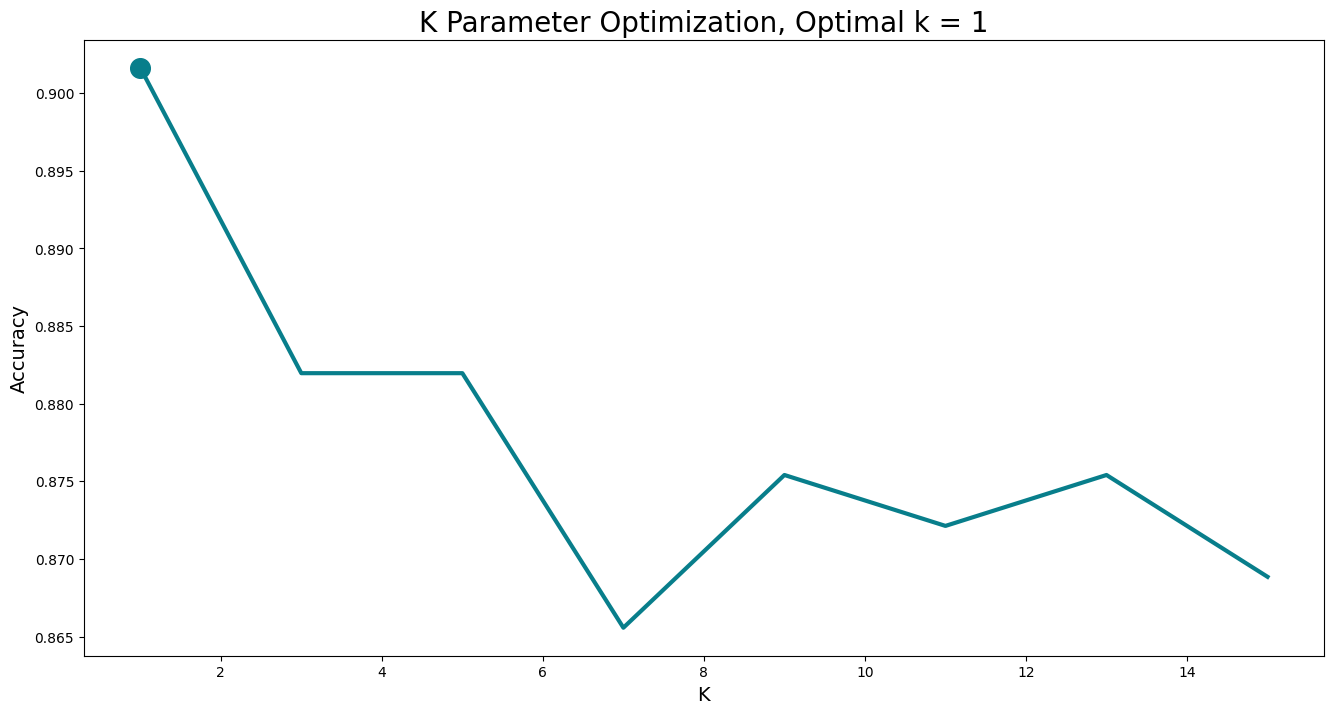

In [49]:
# ToDo
from sklearn.neighbors import KNeighborsClassifier
import math

#print(math.sqrt(len(y_test)))
from sklearn.metrics import accuracy_score
evals = []

for k in range(1, 16, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    yhat_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, yhat_test)
    evals.append({'k': k, 'accuracy': accuracy})

evals = pd.DataFrame(evals)
best_k = evals.sort_values(by='accuracy', ascending=False).iloc[0]

plt.figure(figsize=(16, 8))
plt.plot(evals['k'], evals['accuracy'], lw=3, c='#087E8B')
plt.scatter(best_k['k'], best_k['accuracy'], s=200, c='#087E8B')
plt.title(f"K Parameter Optimization, Optimal k = {int(best_k['k'])}", size=20)
plt.xlabel('K', size=14)
plt.ylabel('Accuracy', size=14)
plt.show()

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
yhat_test = knn.predict(X_test)
yhat_train = knn.predict(X_resamp)

### Report for Model 2

MSE for testing data set is: 0.09836065573770492
MSE for training data set is: 0.011916110581506196
Training:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1049
           1       1.00      0.98      0.99      1049

    accuracy                           0.99      2098
   macro avg       0.99      0.99      0.99      2098
weighted avg       0.99      0.99      0.99      2098

Testing:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       264
           1       0.62      0.68      0.65        41

    accuracy                           0.90       305
   macro avg       0.79      0.81      0.80       305
weighted avg       0.91      0.90      0.90       305



/usr/local/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


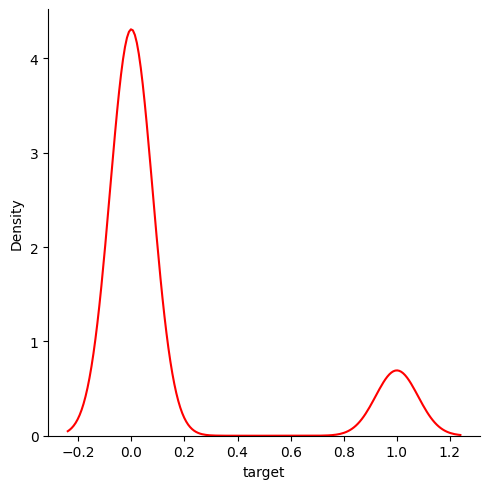

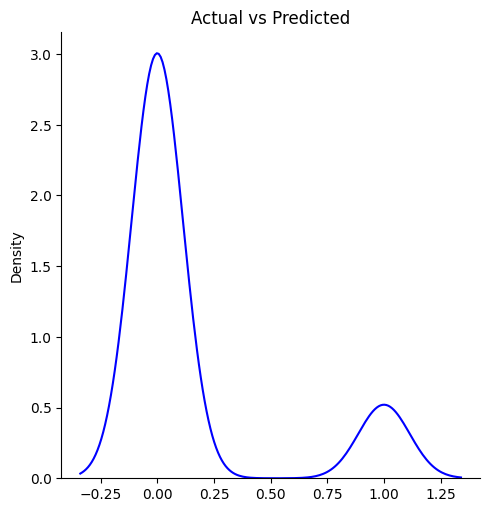

In [50]:
import matplotlib.pyplot as plt

MSE_test = mean_squared_error(y_test, yhat_test)
MSE_train = mean_squared_error(y_resamp, yhat_train)
print("MSE for testing data set is:", MSE_test)
print("MSE for training data set is:", MSE_train)

# classification report
print("Training:\n",classification_report(y_resamp, yhat_train))
print("Testing:\n",classification_report(y_test, yhat_test))